In [1]:
import numpy as np
import pandas as pd

In [2]:
#Sample
data = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [18]:
#No need run, not correct, will turn np.nan into 'np.nan'
data['Description'] = data['Description'].astype('str')
myArray = data['Description'].unique()
for x in myArray:
    if 'ROSES REGENC' in x:
        print(x)

ROSES REGENCY TEACUP AND SAUCER 


In [19]:
#No need run
myArray = data['Description'].unique()
myArray = myArray.astype('str')
for x in myArray:
    if 'ROSES REGENC' in x:
        print(x)

ROSES REGENCY TEACUP AND SAUCER 


In [3]:
data.shape

(541910, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data['InvoiceDate'].iloc[0]

Timestamp('2010-12-01 08:26:00')

In [6]:
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

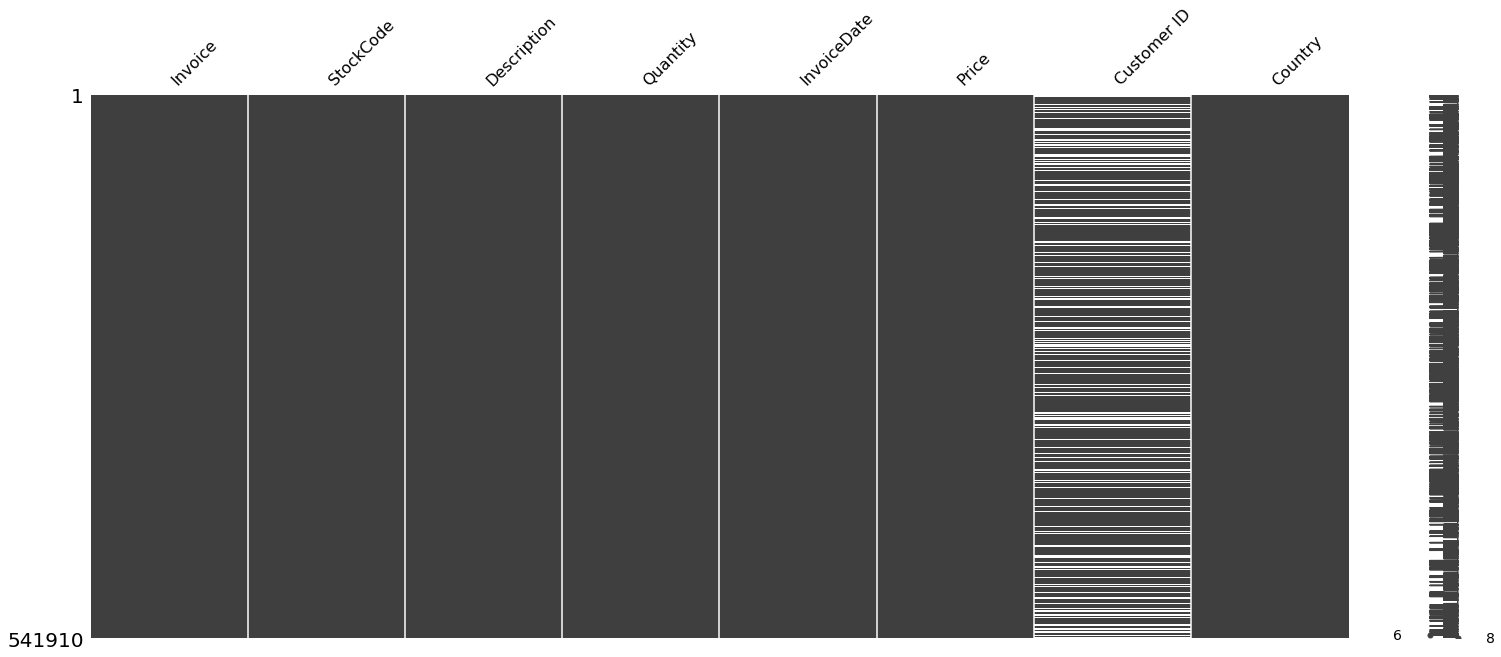

In [7]:
import missingno as msno
msno.matrix(data)

In [8]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [9]:
#Explore for Invoice
data['Invoice'] = data['Invoice'].astype('str')
np.sort(data['Invoice'].unique())

array(['536365', '536366', '536367', ..., 'C581499', 'C581568', 'C581569'],
      dtype=object)

In [10]:
#Modify for Invoice
data = data[~data['Invoice'].str.contains('C')]
data = data[~data['Invoice'].str.contains('A')]
data['Invoice'] = data['Invoice'].astype('int')
data = data.sort_values(by=['Invoice'], ignore_index=True)

In [11]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    134694
Country             0
dtype: int64

In [12]:
data['Description'].nunique()

4206

In [13]:
descArray = data['Description'].unique()
for x in descArray:
    if isinstance(x, str) == False:
        print(x)
        print(type(x))

nan
<class 'float'>
20713
<class 'int'>


In [14]:
#Modify for Description
data['Description'] = data['Description'].str.strip()

In [15]:
data['Description'].nunique()

4193

In [16]:
data.loc[data['Description'] == 'LUNCH BAG  BLACK SKULL.']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
379,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom
593,536412,20727,LUNCH BAG BLACK SKULL.,3,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
1428,536542,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 14:11:00,1.65,16456.0,United Kingdom
2298,536576,20727,LUNCH BAG BLACK SKULL.,60,2010-12-01 16:11:00,1.45,13777.0,United Kingdom
2312,536579,20727,LUNCH BAG BLACK SKULL.,60,2010-12-01 16:16:00,1.45,13777.0,United Kingdom
...,...,...,...,...,...,...,...,...
529450,581413,20727,LUNCH BAG BLACK SKULL.,10,2011-12-08 14:39:00,1.65,16833.0,United Kingdom
530501,581439,20727,LUNCH BAG BLACK SKULL.,2,2011-12-08 16:30:00,4.13,NaN,United Kingdom
531536,581492,20727,LUNCH BAG BLACK SKULL.,2,2011-12-09 10:03:00,4.13,NaN,United Kingdom
532011,581497,20727,LUNCH BAG BLACK SKULL.,8,2011-12-09 10:23:00,4.96,NaN,United Kingdom


In [17]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      1455
Quantity            0
InvoiceDate         0
Price               0
Customer ID    134694
Country             0
dtype: int64

In [18]:
data.shape

(532619, 8)

In [19]:
#Modify for Description
data.dropna(axis=0, subset=['Description'], inplace=True)

In [20]:
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    133239
Country             0
dtype: int64

In [21]:
data['Description'].nunique()

4193

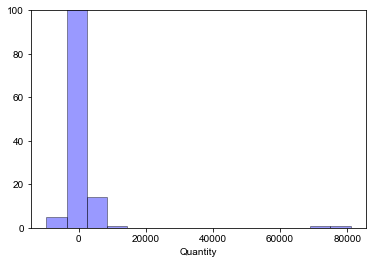

In [22]:
# Explore for Quantity (intentional data)
import matplotlib.pyplot as plt
import seaborn as sns

plt.ylim(0, 100)
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(data['Quantity'],kde=False,bins=15, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [23]:
data[data['Quantity']<0].count()

Invoice        473
StockCode      473
Description    473
Quantity       473
InvoiceDate    473
Price          473
Customer ID      0
Country        473
dtype: int64

In [24]:
data.shape

(531164, 8)

In [25]:
#Modify for Quantity
data = data[data['Quantity']>=0]

In [26]:
data.shape

(530691, 8)

In [27]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
532614,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
532615,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
532616,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
532617,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


In [28]:
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    132766
Country             0
dtype: int64

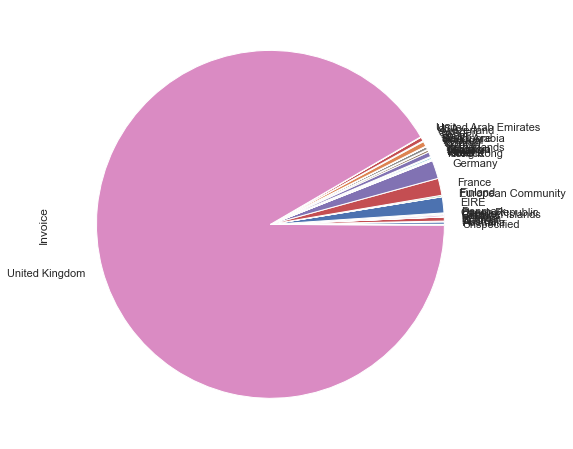

In [29]:
data.groupby(['Country'])['Invoice'].count().plot(kind='pie')

In [30]:
basket = (data[data['Country'] =="United Kingdom"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
basket

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,taig adjust,test,to push order througha s stock was,website fixed,white hanging heart t-light holder,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
Invoice,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.applymap(encode_units)
basket_encoded.drop('POSTAGE', inplace=True, axis=1)
basket_encoded.drop('DOTCOM POSTAGE', inplace=True, axis=1)

In [32]:
basket_encoded

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,taig adjust,test,to push order througha s stock was,website fixed,white hanging heart t-light holder,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
Invoice,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Model for MBA using AA
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket_encoded, min_support=0.03, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.119070,(white hanging heart t-light holder),1
1,0.106536,(JUMBO BAG RED RETROSPOT),1
2,0.092628,(REGENCY CAKESTAND 3 TIER),1
3,0.087626,(PARTY BUNTING),1
4,0.076521,(LUNCH BAG RED RETROSPOT),1
...,...,...,...
134,0.030345,(VINTAGE HEADS AND TAILS CARD GAME),1
135,0.030345,(LARGE WHITE HEART OF WICKER),1
136,0.030180,(SMALL POPCORN HOLDER),1
137,0.030125,(JUMBO BAG PEARS),1


In [35]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051344,0.038645,0.031719,0.617773,15.985646,0.029735,2.515140
1,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038645,0.051344,0.031719,0.820768,15.985646,0.029735,5.292898
2,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.038645,0.052608,0.030015,0.776671,14.763249,0.027982,4.242142
3,(ROSES REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.052608,0.038645,0.030015,0.570533,14.763249,0.027982,2.238482
4,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.052608,0.051344,0.038536,0.732497,14.266445,0.035834,3.546343
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.051344,0.052608,0.038536,0.750535,14.266445,0.035834,3.797698
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.048156,0.051124,0.030949,0.642694,12.571234,0.028487,2.655640
7,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.051124,0.048156,0.030949,0.605376,12.571234,0.028487,2.412031
8,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055302,0.076521,0.030455,0.550696,7.196629,0.026223,2.055353
9,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.076521,0.055302,0.030455,0.397989,7.196629,0.026223,1.569236


In [77]:
#test xia
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':[84,81,82,83,80,85,86,87,88],'id': [1,1,2,2,1,2,1,1,4], 'x':[10,20,100,200,'hello',198,np.nan,'yo',np.nan]})
df['x'] = df.groupby(['id'])['x'].ffill()
print(df)

   name  id      x
0    84   1     10
1    81   1     20
2    82   2    100
3    83   2    200
4    80   1  hello
5    85   2    198
6    86   1  hello
7    87   1     yo
8    88   4    NaN


In [93]:
#test xia
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':[84,81,82,83,80,85,86,87,88,89,90,91],'code':['M','F','G','A','W','Z','Z','J','Z','Z','Z','Z'],'id': [1,1,2,2,1,2,2,1,3,2,2,2], 'x':[10,20,100,np.nan,'hello',198,np.nan,'yo',np.nan,'ye','omega',np.nan]})
df = df.sort_values(by=['name'], ignore_index=True)
df['x'] = df.groupby(['code','id'])['x'].ffill()
print(df)

    name code  id      x
0     80    W   1  hello
1     81    F   1     20
2     82    G   2    100
3     83    A   2    NaN
4     84    M   1     10
5     85    Z   2    198
6     86    Z   2    198
7     87    J   1     yo
8     88    Z   3    NaN
9     89    Z   2     ye
10    90    Z   2  omega
11    91    Z   2  omega


In [135]:
#test xia
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['  ye  sh ','chu       a',' chua','xian','chua ','chua','chua',9.56,'chua','cha','yess'],'id': [1,1,2,2,1,2,1,1,8,9,4], 'x':[10,20,100,200,'hello',198,np.nan,'yo',np.nan,8,np.nan]})
#df['x'] = df.groupby('id').fillna(method='ffill')
df['name'].unique()

array(['  ye  sh ', 'chu       a', ' chua', 'xian', 'chua ', 'chua', 9.56,
       'cha', 'yess'], dtype=object)

In [136]:
print(df['name'].iloc[0])

  ye  sh 


In [137]:
df

,name,id,x
0,ye sh,1,10
1,chu a,1,20
2,chua,2,100
3,xian,2,200
4,chua,1,hello
5,chua,2,198
6,chua,1,NaN
7,9.56,1,yo
8,chua,8,NaN
9,cha,9,8


In [138]:
df.isnull().sum()

name    0
id      0
x       3
dtype: int64

In [139]:
df['name'] = df['name'].str.strip()

In [140]:
df

,name,id,x
0,ye sh,1,10
1,chu a,1,20
2,chua,2,100
3,xian,2,200
4,chua,1,hello
5,chua,2,198
6,chua,1,NaN
7,NaN,1,yo
8,chua,8,NaN
9,cha,9,8


In [141]:
df.isnull().sum()

name    1
id      0
x       3
dtype: int64

In [142]:
df['name'].unique()

array(['ye  sh', 'chu       a', 'chua', 'xian', nan, 'cha', 'yess'],
      dtype=object)

In [143]:
type(df['name'].iloc[10])

str

In [48]:
txt = "     ban  ana     "
x = txt.strip()
x

'ban  ana'

In [56]:
x = ' a b  '
print(x)

 a b  


In [57]:
x = 'ab'
print(x)

ab


In [97]:
myTuple = [1,2]
print(myTuple)

[1, 2]


In [113]:
#test xia
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['chua', np.nan]})

In [114]:
df['name'].unique()

array(['chua', nan], dtype=object)

In [96]:
#df['name'] = df['name'].astype('str')
uArray = df['name'].unique().astype('str')
for x in uArray:
    if 'chua' in x:
        print(x)

chua 


In [92]:
type(uArray)

numpy.ndarray

In [82]:
df['name'].unique()

array(['chua', nan], dtype=object)

In [47]:
df.isnull().sum()

name    1
dtype: int64

In [48]:
type(np.nan)

float

In [177]:
#.str.strip() will not turn np.nan into string
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['chua ',np.nan,np.nan,np.nan]})
df['name'].unique()

array(['chua ', nan], dtype=object)

In [178]:
df

,name
0,chua
1,NaN
2,NaN
3,NaN


In [179]:
df.isnull().sum()

name    3
dtype: int64

In [180]:
df['name'] = df['name'].str.strip()
df['name'].unique()

array(['chua', nan], dtype=object)

In [181]:
df.isnull().sum()

name    3
dtype: int64

In [182]:
type(df['name'].iloc[3])

float

In [184]:
print(df['name'].iloc[3])

nan


In [185]:
df['name'].iloc[3]

nan

In [155]:
#.str.strip() will turn int into np.nan
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['chua ',8056, 'ho','he']})
df['name'].unique()

array(['chua ', 8056, 'ho', 'he'], dtype=object)

In [156]:
df

,name
0,chua
1,8056
2,ho
3,he


In [157]:
df.isnull().sum()

name    0
dtype: int64

In [158]:
df['name'] = df['name'].str.strip()
df.isnull().sum()

name    1
dtype: int64

In [159]:
df

,name
0,chua
1,NaN
2,ho
3,he


In [160]:
df['name'].unique()

array(['chua', nan, 'ho', 'he'], dtype=object)

In [161]:
type(df['name'].iloc[1])

float

In [196]:
#turning 9 and np.nan into '9' and 'np.nan'
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['chua ',9,np.nan]})
df['name'].unique()

array(['chua ', 9, nan], dtype=object)

In [197]:
df.isnull().sum()

name    1
dtype: int64

In [198]:
df['name'] = df['name'].astype('str').str.strip()
df['name'].unique()

array(['chua', '9', 'nan'], dtype=object)

In [199]:
df.isnull().sum()

name    0
dtype: int64

In [200]:
df

,name
0,chua
1,9
2,nan


In [9]:
#turning np.nan into 'np.nan', incorrect
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['chua ',9,np.nan]})
df.isnull().sum()

name    1
dtype: int64

In [10]:
df['name'] = df['name'].astype('str')
df.isnull().sum()

name    0
dtype: int64

In [171]:
#.str.strip() will not turn ' ' into np.nan
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['  ',np.nan,np.nan]})
df['name'].unique()

array(['  ', nan], dtype=object)

In [172]:
df

,name
0,
1,NaN
2,NaN


In [173]:
df.isnull().sum()

name    2
dtype: int64

In [174]:
df['name'] = df['name'].str.strip()
df.isnull().sum()

name    2
dtype: int64

In [175]:
df['name'].unique()

array(['', nan], dtype=object)

In [176]:
df

,name
0,
1,NaN
2,NaN


In [9]:
#.str.strip() will not turn ' ' into np.nan
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['  ']})
df['name'].unique()

array(['  '], dtype=object)

In [10]:
df.isnull().sum()

name    0
dtype: int64

In [11]:
df['name'] = df['name'].str.strip()
df

,name
0,


In [14]:
df.isnull().sum()

name    0
dtype: int64

In [15]:
df['name'].unique()

array([''], dtype=object)

In [154]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['chua ',np.nan,'yo','she','chua ']})
df['name'].unique()

array(['chua ', nan, 'yo', 'she'], dtype=object)

In [170]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':[['chua ',np.nan,'yo','she','chua ']],'id':['d'],})
df.dtypes

name    object
id      object
dtype: object

In [189]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['chua',9,np.nan]})
df['name'].unique()

array(['chua', 9, nan], dtype=object)

In [190]:
df.isnull().sum()

name    1
dtype: int64

In [191]:
df['name'] = df['name'].astype('str')
df['name'].unique()

array(['chua', '9', 'nan'], dtype=object)

In [192]:
df.isnull().sum()

name    0
dtype: int64

In [8]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':[9,np.nan]})
df.dtypes

name    float64
dtype: object

In [98]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':[['chusa ',np.nan,'yo','she','chua']],'id':['d'],})
mylist = ['name','id']
df[mylist]

,name,id
0,"[chusa , nan, yo, she, chua]",d


In [99]:
df

,name,id
0,"[chusa , nan, yo, she, chua]",d
